In [1]:
include("../../src/AdaptiveDM.jl")
using .AdaptiveDM
using StatsPlots, NetCDF

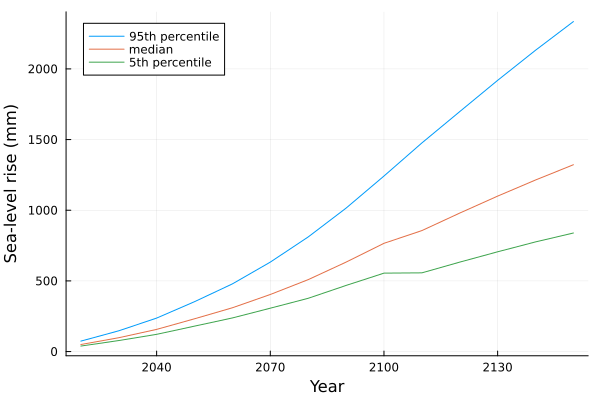

In [26]:
# load AR6 scenario from netCDF file as static scenario
scen = read_ProbStatScen_netcdf("total_ssp585_medium_confidence_values.nc")
plot(scen)

In [27]:
#generate learning scenario from static scenario
learning_scen=lsgenerate_directfit(scen,0.5,false,0)

TransitionFunction{Float64, Nothing}: Time steps: [2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 2130, 2140]
t=2020
      50.0, nothing => [(0.5, 88.0), (0.5, 115.0)]
t=2030
      88.0, nothing => [(0.5, 131.0), (0.5, 157.0)]
      115.0, nothing => [(0.5, 157.0), (0.5, 206.0)]
t=2040
      131.0, nothing => [(0.5, 182.0), (0.5, 211.0)]
      157.0, nothing => [(0.5, 211.0), (0.5, 265.0)]
      206.0, nothing => [(0.5, 265.0), (0.5, 343.0)]
t=2050
      182.0, nothing => [(0.5, 231.0), (0.5, 265.0)]
      211.0, nothing => [(0.5, 265.0), (0.5, 310.0)]
      265.0, nothing => [(0.5, 310.0), (0.5, 388.0)]
      343.0, nothing => [(0.5, 388.0), (0.5, 522.0)]
t=2060
      231.0, nothing => [(0.5, 286.0), (0.5, 327.0)]
      265.0, nothing => [(0.5, 327.0), (0.5, 365.0)]
      310.0, nothing => [(0.5, 365.0), (0.5, 460.0)]
      388.0, nothing => [(0.5, 460.0), (0.5, 561.0)]
      522.0, nothing => [(0.5, 561.0), (0.5, 755.0)]
t=2070
      286.0, nothing => [(0.5, 337.0)

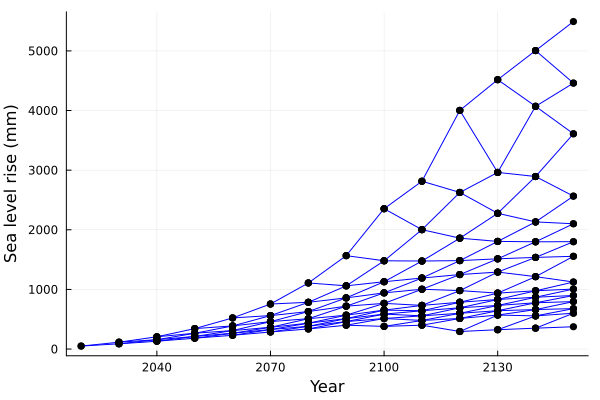

In [28]:
plot(learning_scen)

In [29]:
print(learning_scen)

TransitionFunction{Float64, Nothing}: Time steps: [2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 2130, 2140]
t=2020
      50.0, nothing => [(0.5, 88.0), (0.5, 115.0)]
t=2030
      88.0, nothing => [(0.5, 131.0), (0.5, 157.0)]
      115.0, nothing => [(0.5, 157.0), (0.5, 206.0)]
t=2040
      131.0, nothing => [(0.5, 182.0), (0.5, 211.0)]
      157.0, nothing => [(0.5, 211.0), (0.5, 265.0)]
      206.0, nothing => [(0.5, 265.0), (0.5, 343.0)]
t=2050
      182.0, nothing => [(0.5, 231.0), (0.5, 265.0)]
      211.0, nothing => [(0.5, 265.0), (0.5, 310.0)]
      265.0, nothing => [(0.5, 310.0), (0.5, 388.0)]
      343.0, nothing => [(0.5, 388.0), (0.5, 522.0)]
t=2060
      231.0, nothing => [(0.5, 286.0), (0.5, 327.0)]
      265.0, nothing => [(0.5, 327.0), (0.5, 365.0)]
      310.0, nothing => [(0.5, 365.0), (0.5, 460.0)]
      388.0, nothing => [(0.5, 460.0), (0.5, 561.0)]
      522.0, nothing => [(0.5, 561.0), (0.5, 755.0)]
t=2070
      286.0, nothing => [(0.5, 337.0)

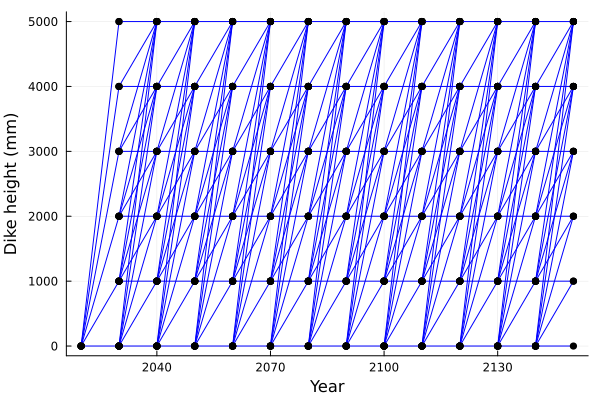

In [30]:
#generate adaptation lattice 
tl_dike = TransitionFunction{Float64}{Float64}([i for i in 2020:10:2150], 0.0,s->collect(0:1000:(5000-s)),(s,a)->[(1.0,(s+a))];unit_time="Year", unit_data="Dike height (mm)")
plot(tl_dike)

In [31]:
print(tl_dike)

TransitionFunction{Float64, Float64}: Time steps: [2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 2130, 2140]
t=2020
      0.0, 0.0 => [(1.0, 0.0)]
      0.0, 4000.0 => [(1.0, 4000.0)]
      0.0, 3000.0 => [(1.0, 3000.0)]
      0.0, 2000.0 => [(1.0, 2000.0)]
      0.0, 5000.0 => [(1.0, 5000.0)]
      0.0, 1000.0 => [(1.0, 1000.0)]
t=2030
      0.0, 0.0 => [(1.0, 0.0)]
      0.0, 4000.0 => [(1.0, 4000.0)]
      0.0, 3000.0 => [(1.0, 3000.0)]
      0.0, 2000.0 => [(1.0, 2000.0)]
      0.0, 5000.0 => [(1.0, 5000.0)]
      0.0, 1000.0 => [(1.0, 1000.0)]
      1000.0, 0.0 => [(1.0, 1000.0)]
      1000.0, 4000.0 => [(1.0, 5000.0)]
      1000.0, 3000.0 => [(1.0, 4000.0)]
      1000.0, 2000.0 => [(1.0, 3000.0)]
      1000.0, 1000.0 => [(1.0, 2000.0)]
      2000.0, 0.0 => [(1.0, 2000.0)]
      2000.0, 3000.0 => [(1.0, 5000.0)]
      2000.0, 2000.0 => [(1.0, 4000.0)]
      2000.0, 1000.0 => [(1.0, 3000.0)]
      3000.0, 0.0 => [(1.0, 3000.0)]
      3000.0, 2000.0 => [(1.0, 500

In [32]:
#combine adaptation and slr lattice into one
tl = combineTransitionFunction(learning_scen,tl_dike)
println("")

In [33]:
#define (dummy) damage, invest, maintenance and operation functions 
#these functions will connect AdaptiveDM and DIVA!
damage(s,t) = maximum([1000*(s[1]-s[2]),0])
invest(s,action,t) = action*20000
maintenance(s,t)=invest(s[2],0.0,0)*0.01
#discont value
discount=0.014

#define cost function that combines all the functions above
cost=cost_function(damage,invest,maintenance)

cost_function(damage, invest, maintenance)

In [34]:
#apply dynamic programming, first backwards, then forwards
V,Pi=DP_back(tl,cost,discount)
solution=DP_forward(tl,Pi)

TransitionFunction{Tuple{Float64, Float64}, Float64}: Time steps: [2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 2130, 2140]
t=2020
      (50.0, 0.0), 0.0 => [(0.5, (88.0, 0.0)), (0.5, (115.0, 0.0))]
t=2030
      (88.0, 0.0), 0.0 => [(0.5, (131.0, 0.0)), (0.5, (157.0, 0.0))]
      (115.0, 0.0), 0.0 => [(0.5, (157.0, 0.0)), (0.5, (206.0, 0.0))]
t=2040
      (131.0, 0.0), 0.0 => [(0.5, (182.0, 0.0)), (0.5, (211.0, 0.0))]
      (157.0, 0.0), 0.0 => [(0.5, (211.0, 0.0)), (0.5, (265.0, 0.0))]
      (206.0, 0.0), 1000.0 => [(0.5, (265.0, 1000.0)), (0.5, (343.0, 1000.0))]
t=2050
      (182.0, 0.0), 0.0 => [(0.5, (231.0, 0.0)), (0.5, (265.0, 0.0))]
      (211.0, 0.0), 0.0 => [(0.5, (265.0, 0.0)), (0.5, (310.0, 0.0))]
      (265.0, 0.0), 1000.0 => [(0.5, (310.0, 1000.0)), (0.5, (388.0, 1000.0))]
      (265.0, 1000.0), 0.0 => [(0.5, (310.0, 1000.0)), (0.5, (388.0, 1000.0))]
      (343.0, 1000.0), 0.0 => [(0.5, (388.0, 1000.0)), (0.5, (522.0, 1000.0))]
t=2060
      (231.0, 0.0

In [35]:
print_actions(solution)

TransitionFunction{Tuple{Float64, Float64}, Float64}: Time steps: [2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 2130, 2140]
t=2020
t=2030
t=2040
    if Sea level rise (mm), Dike height (mm) = (206.0, 0.0), do 1000.0
t=2050
    if Sea level rise (mm), Dike height (mm) = (265.0, 0.0), do 1000.0
t=2060
    if Sea level rise (mm), Dike height (mm) = (231.0, 0.0), do 1000.0
    if Sea level rise (mm), Dike height (mm) = (265.0, 0.0), do 1000.0
    if Sea level rise (mm), Dike height (mm) = (310.0, 0.0), do 1000.0
t=2070
t=2080
t=2090
    if Sea level rise (mm), Dike height (mm) = (1566.0, 1000.0), do 1000.0
t=2100
    if Sea level rise (mm), Dike height (mm) = (1480.0, 1000.0), do 1000.0
t=2110
t=2120
t=2130
t=2140


check algorithm with simple example

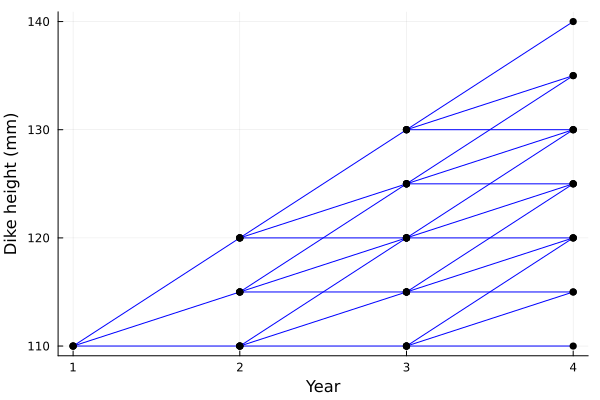

In [13]:
#check simple example
today=110
function actions(d)
    [0,5,10]
end 
function action_trans(d,u)
    [(1.0,(d+u))] 
end 

dike =TransitionFunction{typeof(today)}{typeof(today)}([1,2,3,4], today, actions, action_trans; unit_time="Year", unit_data="Dike height (mm)")
plot(dike)

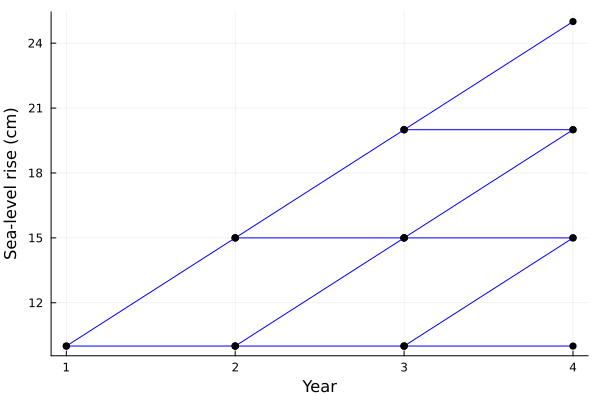

In [14]:



tl_slr = TransitionFunction{Float64,Nothing}([1,2,3,4],10.0,s->[nothing],(s,a)->[(.5,s+0),(.5,s+5)], unit_time="Year", unit_data="Sea-level rise (cm)")
plot(tl_slr)

In [15]:
tl = combineTransitionFunction(dike,tl_slr)
print(tl)

TransitionFunction{Tuple{Int64, Float64}, Int64}: Time steps: [1, 2, 3]
t=1
      (110, 10.0), 0 => [(0.5, (110, 10.0)), (0.5, (110, 15.0))]
      (110, 10.0), 5 => [(0.5, (115, 10.0)), (0.5, (115, 15.0))]
      (110, 10.0), 10 => [(0.5, (120, 10.0)), (0.5, (120, 15.0))]
t=2
      (110, 10.0), 0 => [(0.5, (110, 10.0)), (0.5, (110, 15.0))]
      (110, 10.0), 5 => [(0.5, (115, 10.0)), (0.5, (115, 15.0))]
      (110, 10.0), 10 => [(0.5, (120, 10.0)), (0.5, (120, 15.0))]
      (110, 15.0), 0 => [(0.5, (110, 15.0)), (0.5, (110, 20.0))]
      (110, 15.0), 5 => [(0.5, (115, 15.0)), (0.5, (115, 20.0))]
      (110, 15.0), 10 => [(0.5, (120, 15.0)), (0.5, (120, 20.0))]
      (115, 10.0), 0 => [(0.5, (115, 10.0)), (0.5, (115, 15.0))]
      (115, 10.0), 5 => [(0.5, (120, 10.0)), (0.5, (120, 15.0))]
      (115, 10.0), 10 => [(0.5, (125, 10.0)), (0.5, (125, 15.0))]
      (115, 15.0), 0 => [(0.5, (115, 15.0)), (0.5, (115, 20.0))]
      (115, 15.0), 5 => [(0.5, (120, 15.0)), (0.5, (120, 20.0))]
      

In [16]:
damage(s,t) = maximum([0,200*(100+s[2]-s[1])])
invest(s,action,t) = action*100
maintenance(s,t)=0
#discont value
discount=0.0

#define cost function that combines all the functions above
cost=cost_function(damage,invest,maintenance)

cost_function(damage, invest, maintenance)

In [17]:
#apply dynamic programming, first backwards, then forwards
V,Pi=DP_back(tl,cost,discount)
solution=DP_forward(tl,Pi)
print_actions(solution)

TransitionFunction{Tuple{Int64, Float64}, Int64}: Time steps: [1, 2, 3]
t=1
    if Dike height (mm), Sea-level rise (cm) = (110, 10.0), do 5
t=2
t=3


In [18]:
V

Dict{Tuple{Int64, Any}, Any} with 22 entries:
  (2, (120, 10.0)) => 0.0
  (3, (125, 20.0)) => 0.0
  (2, (115, 15.0)) => 500.0
  (3, (125, 10.0)) => 0.0
  (3, (115, 20.0)) => 1000.0
  (3, (130, 20.0)) => 0.0
  (3, (115, 10.0)) => 0.0
  (3, (130, 10.0)) => 0.0
  (2, (110, 15.0)) => 2000.0
  (3, (110, 20.0)) => 2000.0
  (3, (110, 10.0)) => 0.0
  (3, (120, 15.0)) => 0.0
  (2, (115, 10.0)) => 0.0
  (2, (110, 10.0)) => 500.0
  (2, (120, 15.0)) => 0.0
  (3, (120, 20.0)) => 0.0
  (3, (125, 15.0)) => 0.0
  (3, (120, 10.0)) => 0.0
  (3, (115, 15.0)) => 0.0
  ⋮                => ⋮